<a href="https://colab.research.google.com/github/alinemls/datasets/blob/main/K_means_and_M%C3%A9todo_Lopes(Dataset_Iris)-MC%20e%20CS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, cohen_kappa_score as kappa, classification_report
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPRegressor 
from sklearn import metrics
from sklearn.preprocessing import KBinsDiscretizer
from yellowbrick.classifier import ConfusionMatrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import matplotlib.pyplot as plt
import math 
%matplotlib inline

In [55]:
# Carregando dataframe
df = pd.read_csv('https://raw.githubusercontent.com/alinemls/datasets/main/Iris.csv')

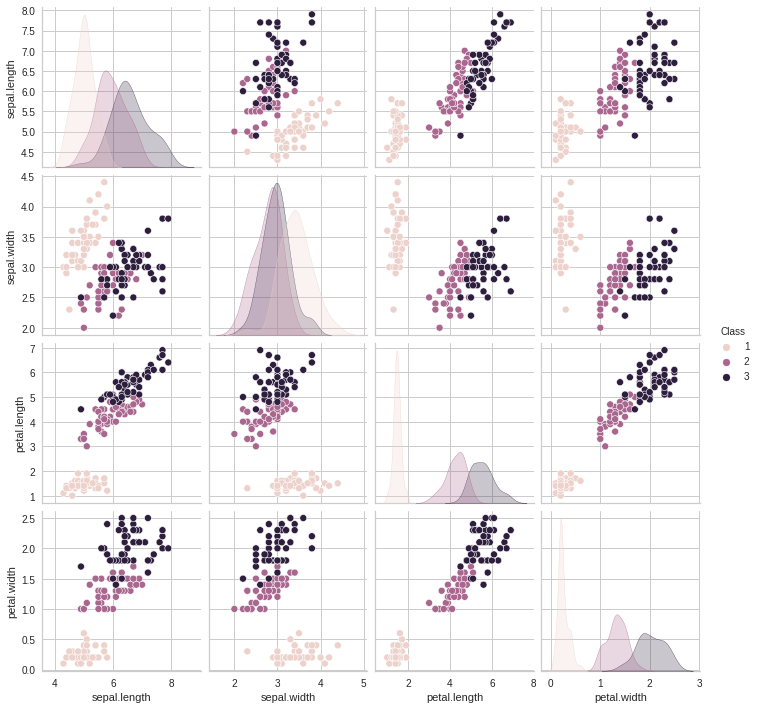

In [56]:
sb.pairplot(df, hue="Class") # Com variavel alvo
#sb.pairplot(df) # Sem a variavel Alvo -> Como o Kmeans Ver

In [57]:
# Dados do dataframe, sem a variavel alvo(variety)
# X = np.array(df.drop('Class', axis = 1))
X = df.drop('Class', axis = 1) 
copyX = X.copy(deep=True)

In [58]:
# X

# Definindo o Valor de K

### Método do cotovelo

In [59]:
# função que recebe um conjunto de dados, calcula o KMeans para 19 quantidades de clusters que vão de 2 a 20 possíveis 
# agrupamentos e, finalmente, retorna uma lista com o nosso wcss:
def calculate_wcss(data):
    """Calcula a soma dos quadrados intra-clusters para 19 quantidades de clusters, iniciando com o mínimo de 2 clusters"""
    wcss = []
    for n in range(2, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

In [60]:
#wcss = calculate_wcss(X)

In [61]:
#cálculo da distância entre um ponto e uma reta
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [62]:
#K = optimal_number_of_clusters(wcss)
#K

### Método da silhueta

In [63]:
from sklearn.metrics import silhouette_score

def calculate_silhouette_score(data):
    silhouette_avg = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        cluster_labels = kmeans.labels_
        #cluster_labels = kmeans.predict(data)
        silhouette_avg.append((n, silhouette_score(data, cluster_labels)))
    return silhouette_avg

In [64]:
si = calculate_silhouette_score(X)

In [65]:
si

[(2, 0.6810461692117465),
 (3, 0.5528190123564102),
 (4, 0.49805050499728815),
 (5, 0.48874888709310654),
 (6, 0.36483400396700366),
 (7, 0.35817224727219793),
 (8, 0.3375549286933401),
 (9, 0.3324049444649434),
 (10, 0.30875584788869775),
 (11, 0.3135454765975037),
 (12, 0.2888095859832372),
 (13, 0.2917691830502069),
 (14, 0.2775699742561823),
 (15, 0.281303550798882),
 (16, 0.3020882650774395),
 (17, 0.26833710998322713),
 (18, 0.2962634483726303),
 (19, 0.27627342194523463),
 (20, 0.25969444833793937)]

In [66]:
def calculte_K(matrix):
  #Retorna o maior valor de do coeficiente da silhueta
  maior_t = matrix[0]
  for t in matrix:
    if t[1] > maior_t[1]:
      maior_t = t

  return maior_t 

In [67]:
#K = calculte_K(si)[0]
#K

## Agrupamento com K-means

In [68]:
# Quantidade de Clusters
# switch_method -> 1 - Método do cotovelo, 2 - Silhueta
switch_method = 1
if switch_method == 1:
  wcss = calculate_wcss(X)
  K = optimal_number_of_clusters(wcss)
elif switch_method == 2:
  si = calculate_silhouette_score(X)
  K = calculte_K(si)[0]


print(K)

6


In [69]:
kMeans = KMeans(n_clusters=K, random_state=0)
# kmeans = KMeans(n_clusters=3, init = "random", n_init = 10) #algoritmo que define a posição dos clusters de maneira mais assertiva
# kmeans = KMeans(n_clusters=3, algorithm="elkan") # Escolhendo o algoritmo, por padrão é o auto. opções -> auto, full, elkan

In [70]:
kMeans.fit(X)

KMeans(n_clusters=6, random_state=0)

In [71]:
# Grupos criados
copyX['grupo'] = kMeans.labels_
kMeans.labels_

array([1, 5, 5, 5, 1, 1, 5, 1, 5, 5, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 1, 5, 5, 1, 1, 5, 1, 1, 5, 5, 1,
       1, 5, 1, 5, 1, 5, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 0, 3, 4, 0, 0, 4, 2, 4, 0, 4,
       0, 0, 0, 3, 0, 0, 0, 4, 4, 3, 0, 3, 4, 3, 0, 4, 3, 3, 0, 4, 4, 4,
       0, 3, 3, 4, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3], dtype=int32)

In [72]:
# Quantidade de dados em cada grupo
for K_instantes in range(K):
  print(f"Valor de elementos do grupo {K_instantes} - {list(kMeans.labels_).count(K_instantes)}")
  #print(f"Valor de elementos do grupo 1 - {list(kMeans.labels_).count(1)}")
  #print(f"Valor de elementos do grupo 2 - {list(kMeans.labels_).count(2)}")

Valor de elementos do grupo 0 - 24
Valor de elementos do grupo 1 - 28
Valor de elementos do grupo 2 - 25
Valor de elementos do grupo 3 - 39
Valor de elementos do grupo 4 - 12
Valor de elementos do grupo 5 - 22


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


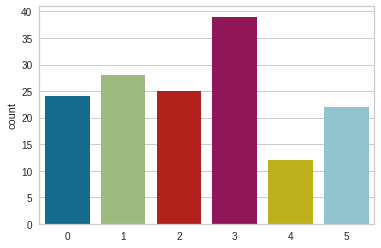

In [73]:
sb.countplot(kMeans.labels_) # Para saber o valor exato, remova o comentario das linhas acima e coloque em count qual o valor deseja contar

## Rotulação dos dados

In [74]:
t_sel_att = "Regressao MLP"
# Regressao MLP
# Classificador MLP
# Mutual Info

qtd_teste = 0.3 # Porcentagem de dados para teste no seletor de atributos supervisionado

In [75]:
if (t_sel_att == "Classificador MLP") or (t_sel_att == "Regressao MLP"):

  v_grupo = []
  v_attr = []
  v_accu = []

  t_grupos = copyX['grupo'].unique()
  qtd_grupos = len(t_grupos)
  #print(qtd_grupos)

  ##### Para cada Grupo #####
  for iGrupos in t_grupos:    
    #print("\n\n############ Grupo: ", iGrupos, " ############")
    base = copyX.query("grupo == "+str(iGrupos))
    base = base.drop(columns=['grupo']) # Apaga o grupo
    #print(base)


    qtd_col = copyX.columns.size - 1   
    ##### Para cada coluna #####
    for i_col in range(0, qtd_col):

      treino, teste = train_test_split(base, test_size = qtd_teste)
      Y_train = treino.iloc[:, i_col]
      Y_teste = teste.iloc[:, i_col]
      X_train = treino.drop(treino.columns[i_col], axis=1)
      X_teste = teste.drop(teste.columns[i_col], axis=1)
      #print(X_train)
      #print(Y_train)

      #### Predição
      if t_sel_att == "Classificador MLP":
        
        atributo = Y_train.name
        Y_train = np.asarray(Y_train, dtype="int_")
        
        #print(Y_train)
        #X_teste = np.asarray(X_teste, dtype="int_")
        
        clp = mlp(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
        clp.fit(X_train,Y_train)
        Y_pred = clp.predict(X_teste)
        Y_teste = np.asarray(Y_teste, dtype="int_")
        
        cm = confusion_matrix(Y_pred, Y_teste)
        acuracia = accuracy(cm)

      #### Regressão  
      if t_sel_att == "Regressao MLP":
        
        atributo = Y_train.name

        model = MLPRegressor(solver='lbfgs',alpha=0.001,hidden_layer_sizes=(3,2))
        model.fit(X_train,Y_train)
        Y_pred = model.predict(X_teste)

        #print("Score : ", model.score(X_teste, Y_teste))
        
        #acuracia = 1-metrics.mean_squared_log_error(Y_teste, Y_pred)
        #acuracia = 1-metrics.mean_absolute_percentage_error(Y_teste, Y_pred)
        acuracia = 1-metrics.mean_squared_error(Y_teste, Y_pred)
        
        #print("Acerto médio de ", Y_train.name, ": ", acuracia)

      v_grupo.append(iGrupos)
      v_attr.append(atributo)
      v_accu.append(acuracia)


      ##### Fim para cada coluna #####


    ##### Fim para cada Grupo #####

  #coloca os resultados em uma matriz 
  v_resul = np.array([v_grupo, v_attr, v_accu])
  v_resul = v_resul.T
  v_resul = pd.DataFrame(v_resul, columns = [ 'grupo', 'atrib', 'accu' ])
  #v_resul = v_resul.reset_index()
  v_resul["accu"] = pd.to_numeric(v_resul["accu"])
  v_resul["grupo"] = pd.to_numeric(v_resul["grupo"])

  print(v_resul)

if (t_sel_att == "Mutual Info"):
  from sklearn.feature_selection import mutual_info_classif
  l_atrib = copyX.columns.to_list()
  l_atrib.pop()
  X = copyX.drop(columns=['grupo'])
  #print(X)
  y = copyX["grupo"]
  l_rank = mutual_info_classif(X, y, discrete_features=True)
  t_grupos = copyX['grupo'].unique()
  v_resul_f = []
  v_grupo_f = []
  v_attr_f = []
  v_accu_f = []
  count = 0
  g = 0
  for g in range(len(t_grupos)):
    #print("Grupo-->", t_grupos[g])
    for r in range(len(l_rank)):
      #print("Grupo: ", t_grupos[g], "Atributo: ", l_atrib[r], "Rank: ", l_rank[r])
      v_grupo_f.append(t_grupos[g])
      v_attr_f.append(l_atrib[r])
      v_accu_f.append(l_rank[r])
      #v_grupo_f[count] = t_grupos[g]
      #v_resul_f[count] = [g, l_atrib[r], l_rank[r]]
    #  print(count)
    #  v_resul_f[0] = [1, "sdsda", 8234]
      count = count + 1

  v_resul_f = np.array([v_grupo_f, v_attr_f, v_accu_f])
  v_resul_f = v_resul_f.T
  v_resul_f = pd.DataFrame(v_resul_f, columns = [ 'grupo', 'atrib', 'accu' ])
  #v_resul = v_resul.reset_index()
  v_resul_f["accu"] = pd.to_numeric(v_resul_f["accu"])
  v_resul_f["grupo"] = pd.to_numeric(v_resul_f["grupo"])
  v_resul = v_resul_f
  print (v_resul)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


    grupo         atrib      accu
0       1  sepal.length  0.962105
1       1   sepal.width  0.890935
2       1  petal.length  0.977697
3       1   petal.width  0.989158
4       5  sepal.length  0.962431
5       5   sepal.width  0.835418
6       5  petal.length  0.943297
7       5   petal.width  0.996342
8       3  sepal.length  0.896480
9       3   sepal.width  0.929101
10      3  petal.length  0.884345
11      3   petal.width  0.979742
12      2  sepal.length  0.893778
13      2   sepal.width  0.959476
14      2  petal.length  0.814412
15      2   petal.width  0.950819
16      0  sepal.length  0.902656
17      0   sepal.width  0.921813
18      0  petal.length  0.916055
19      0   petal.width  0.920490
20      4  sepal.length  0.890114
21      4   sepal.width  0.729844
22      4  petal.length  0.940000
23      4   petal.width  0.964998


## Baseada em Lopes

In [76]:
n_base = "iris"
n_normalizacao = 0  # 0(não normalizado), 1(desvio padrão), 2(escala 0 a 1)
v_variation = 0.15
num_grupos = K      # 0(pela classe) 
qtd_faixas = 5      # 0(automático) 
t_discre = "uniform"

In [77]:

def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return (diagonal_sum / sum_of_all_elements)*100

#print(data)
print('\033[1m', "<><><><><><> Parâmetros <><><><><><><>", '\033[0m')
print("Nome da Base:", n_base)
print("Tipo de Normalização:", n_normalizacao)
print("Variação V:", v_variation)
if (num_grupos == 0):
  print("Número de Grupos(formados pela classe):", qtd_classes)
else:
  print("Número de Grupos(k):", num_grupos)
print("Quantidade de Faixas:", qtd_faixas)
print("Seleção de Atributos:", t_sel_att)



#<><><><><> Discretização <><><><><>
base = copyX.drop(columns=['grupo']) # Apaga o grupo
col_grupo = copyX["grupo"]
col_nomes = list(base.columns)

enc = KBinsDiscretizer(n_bins=qtd_faixas, strategy=t_discre, encode="ordinal")
base_d = enc.fit_transform(base)
base_d = pd.DataFrame(base_d,columns=col_nomes) 
base_d['grupo'] = col_grupo

#print(base_d)


#pega os atributos com acurácia até v_variation pior 
t_grupos = v_resul['grupo'].unique()
#print(t_grupos)
print('\033[1m', "\n<><><><><><><> Rótulos <><><><><><><>", '\033[0m')
iGrupos = 0
count = 0
##### Para cada Grupo #####
for iGrupos in t_grupos: 
  r_base = v_resul.query("grupo == "+str(iGrupos))
  #print("\nr_base:", r_base)
  #print("\nBase_d:\n", base_d)
  print("\n===> Grupo "+str(iGrupos), "(", copyX['grupo'].value_counts()[count],"elementos)")
  count = count+1
  #print(r_base)
  #best_att = r_base.loc[r_base['accu'] == r_base["accu"].max()]
  print(r_base["accu"].max())
  print((r_base["accu"].max()*v_variation))
  print((r_base["accu"].max())-(r_base["accu"].max()*v_variation))
  best_att = r_base.loc[r_base['accu'] >= r_base["accu"].max()-(r_base["accu"].max()*v_variation)]
  #print(r_base["accu"].max()-(r_base["accu"].max()*v_variation))
  
  #print(best_att)
  #print("\nBest_att:\n", best_att, "\n")

  for i in best_att.index:
    print("Atributo: ", best_att["atrib"][i] , "(",best_att["accu"][i],")")
    r_base = base_d.query("grupo == "+str(iGrupos))
    #print("\nr_base:\n", r_base)
    faixas = enc.bin_edges_[r_base.columns.get_loc(best_att["atrib"][i])] 
    melhor_faixa = r_base[best_att["atrib"][i]].value_counts()

    #print(r_base)
    acertos = r_base[best_att["atrib"][i]].value_counts().tolist()
    #print ("Acertos:", acertos)
    
    index = melhor_faixa.index
    indexNamesArr = melhor_faixa.index.values
    l_inter = list(indexNamesArr)
    indice_melhor = int(l_inter[0])
    
    tx_acerto = (acertos[0]*100)/len(r_base.index)

    print("Faixa: ", faixas[indice_melhor], "-", faixas[indice_melhor+1], "(", tx_acerto,")")
    
    
    #print(len(r_base.index))


  


##### Fim para cada Grupo #####




 <><><><><><> Parâmetros <><><><><><><> 
Nome da Base: iris
Tipo de Normalização: 0
Variação V: 0.15
Número de Grupos(k): 6
Quantidade de Faixas: 5
Seleção de Atributos: Regressao MLP
 
<><><><><><><> Rótulos <><><><><><><> 

===> Grupo 1 ( 24 elementos)
0.9891583201857608
0.1483737480278641
0.8407845721578967
Atributo:  sepal.length ( 0.9621052897134744 )
Faixa:  5.02 - 5.74 ( 75.0 )
Atributo:  sepal.width ( 0.8909353579475603 )
Faixa:  3.4400000000000004 - 3.9200000000000004 ( 60.714285714285715 )
Atributo:  petal.length ( 0.9776974310484864 )
Faixa:  1.0 - 2.18 ( 100.0 )
Atributo:  petal.width ( 0.9891583201857608 )
Faixa:  0.1 - 0.58 ( 96.42857142857143 )

===> Grupo 5 ( 28 elementos)
0.9963419729813208
0.1494512959471981
0.8468906770341227
Atributo:  sepal.length ( 0.9624306188662128 )
Faixa:  4.3 - 5.02 ( 100.0 )
Atributo:  petal.length ( 0.943296609481275 )
Faixa:  1.0 - 2.18 ( 100.0 )
Atributo:  petal.width ( 0.9963419729813208 )
Faixa:  0.1 - 0.58 ( 100.0 )

===> Grupo 3 ( 25 

# Divisão dos Dados em Treino e Teste

In [78]:
X = np.array(df.drop("Class",axis=1)) # Base de dados sem a variavel de decisão
y = kMeans.labels_ # Saída do K-means
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

# Comparando as classes criadas com as classes Existentes

In [79]:
# Fazendo a copia do dataframe
#df_copy = df.copy()

In [80]:
#df_copy["K_classes"] = kMeans.labels_

In [81]:
#sb.pairplot(df_copy, hue="K_classes")

# Decision Tree

### Decision Tree com dados obtidos do K-means

In [82]:
from sklearn import tree

In [83]:
clf = tree.DecisionTreeClassifier()

In [84]:
clf = clf.fit(X_train, y_train)

In [85]:
pred_k = clf.predict(X_test)

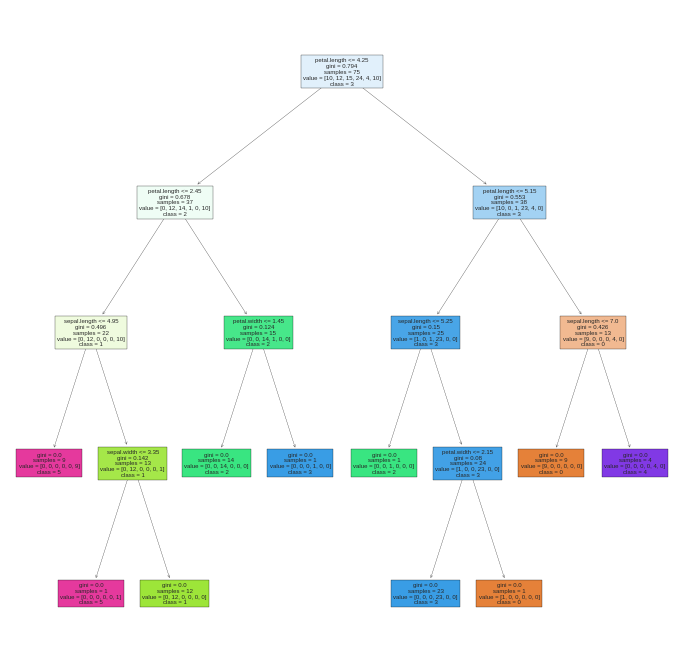

In [86]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, feature_names = df.columns, class_names=[str(K_instantes) for K_instantes in range(K)], filled = True)
plt.show()

### Decision Tree com dados originais (Sem passar pelo K-means)

In [87]:
X_tree = np.array(df.drop('Class', axis = 1))
y_tree = df.Class

In [88]:
dTree = tree.DecisionTreeClassifier()

In [89]:
dTree = dTree.fit(X_tree, y_tree)

In [90]:
pred_original = dTree.predict(X_test)

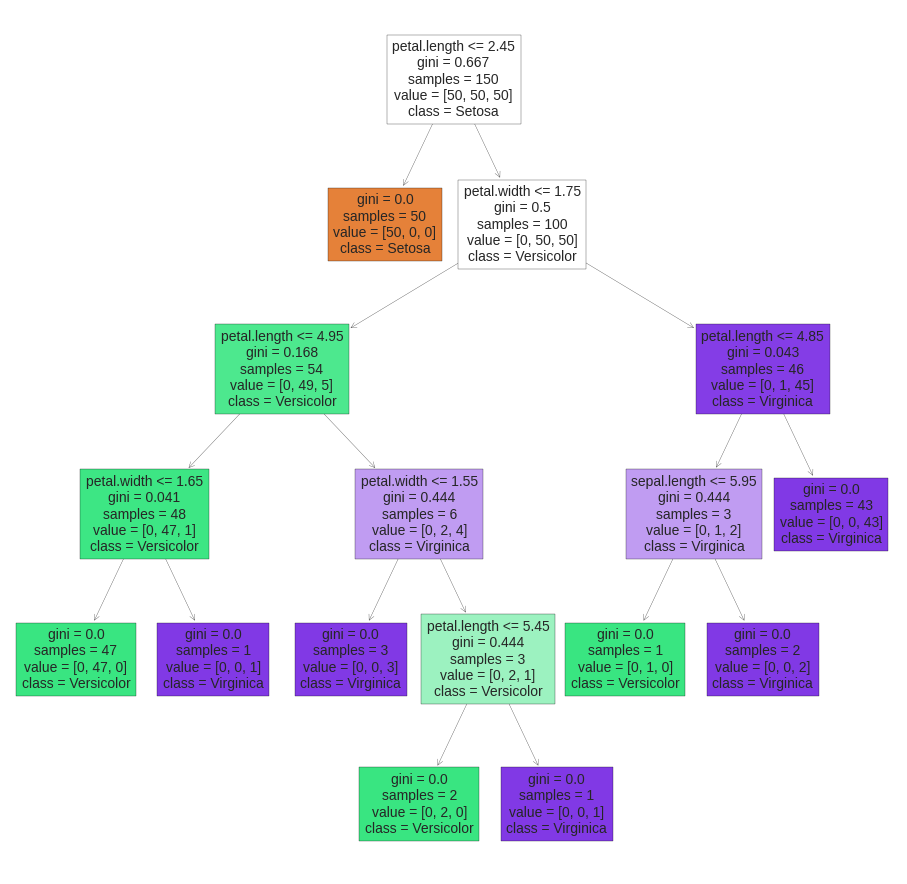

In [91]:
plt.figure(figsize=(16,16))  # set plot size (denoted in inches)
tree.plot_tree(dTree, feature_names = df.columns, class_names=['Setosa','Versicolor','Virginica'], filled = True)
plt.show()

# Hiperparamentros

In [92]:
params = [
      {
        'criterion':['gini','entropy'],
        'max_depth':[None,2,4,8,10,30,50,100]  
      }
]
clf_tree = tree.DecisionTreeClassifier(max_depth=8)
grid_search = GridSearchCV(clf_tree, params, scoring='accuracy')
grid_search.fit(X_train,y_train)
grid_search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


{'criterion': 'gini', 'max_depth': 100}

In [93]:
clf_tree.fit(X_train,y_train)
pred = clf_tree.predict(X_test)
pred[:10]

array([0, 5, 4, 1, 3, 4, 1, 5, 0, 5], dtype=int32)

In [94]:
y_test[:10]

array([0, 5, 4, 1, 3, 4, 1, 5, 0, 5], dtype=int32)

# Relevância 

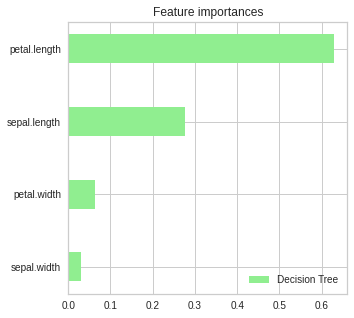

In [95]:
feature_importance=pd.DataFrame({'dt' : clf.feature_importances_}, index=df.drop(columns=['Class']).columns)
feature_importance.sort_values(by='dt',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig,ax = plt.subplots(figsize=(5,5))
dt_feature=ax.barh(index+0.4, feature_importance['dt'], 0.4, color='lightgreen', label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)
ax.set_title("Feature importances")
ax.legend()
plt.show()

# Exibição das regras

In [96]:
# !pip install graphviz

In [97]:
import graphviz

In [98]:
df.columns.drop('Class')

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], dtype='object')

In [99]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=df.columns.drop('Class'),  
                      class_names=[str(K_instantes) for K_instantes in range(K)],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
# graph
graph.render(filename="iris", view=True, format='png')

'iris.png'

In [100]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']) # árvore com o K-means
# r = export_text(dTree, feature_names=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']) # árvore original
print(r)

|--- Petal_Length <= 4.25
|   |--- Petal_Length <= 2.45
|   |   |--- Sepal_Length <= 4.95
|   |   |   |--- class: 5
|   |   |--- Sepal_Length >  4.95
|   |   |   |--- Sepal_Width <= 3.35
|   |   |   |   |--- class: 5
|   |   |   |--- Sepal_Width >  3.35
|   |   |   |   |--- class: 1
|   |--- Petal_Length >  2.45
|   |   |--- Petal_Width <= 1.45
|   |   |   |--- class: 2
|   |   |--- Petal_Width >  1.45
|   |   |   |--- class: 3
|--- Petal_Length >  4.25
|   |--- Petal_Length <= 5.15
|   |   |--- Sepal_Length <= 5.25
|   |   |   |--- class: 2
|   |   |--- Sepal_Length >  5.25
|   |   |   |--- Petal_Width <= 2.15
|   |   |   |   |--- class: 3
|   |   |   |--- Petal_Width >  2.15
|   |   |   |   |--- class: 0
|   |--- Petal_Length >  5.15
|   |   |--- Sepal_Length <= 7.00
|   |   |   |--- class: 0
|   |   |--- Sepal_Length >  7.00
|   |   |   |--- class: 4



# Medição de desempenho

In [101]:
print("Acurácia: %.2f" % (clf.score(X_test,y_test)))

Acurácia: 0.92


In [102]:
clf.score(X_test,y_test)

0.92

In [103]:
print("Coeficiente de Kappa: %.2f" % (kappa(y_test, pred_k)) )

Coeficiente de Kappa: 0.90


In [104]:
print(classification_report(y_test, pred_k))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       1.00      0.88      0.93        16
           2       1.00      0.80      0.89        10
           3       0.82      0.93      0.87        15
           4       1.00      1.00      1.00         8
           5       0.86      1.00      0.92        12

    accuracy                           0.92        75
   macro avg       0.93      0.92      0.92        75
weighted avg       0.93      0.92      0.92        75



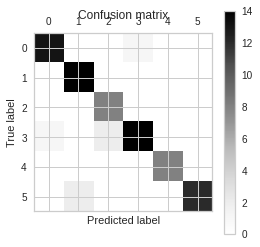

In [105]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
matriz_confusao = confusion_matrix(model.predict(X_test), y_test)
#matriz_confusao

plt.matshow(matriz_confusao)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [106]:
matriz_confusao

array([[13,  0,  0,  1,  0,  0],
       [ 0, 14,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0],
       [ 1,  0,  2, 14,  0,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  2,  0,  0,  0, 12]])